In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

In [25]:
# Generating normally distributed populations
bi = pd.DataFrame()
bi["pop1"] = np.random.binomial(10, 0.2, 10000)
bi["pop2"] = np.random.binomial(10, 0.5, 10000)

In [26]:
# Random sample from normal populations
p1_samp = np.random.choice(bi["pop1"], size=100, replace=True)
p2_samp = np.random.choice(bi["pop2"], size=100, replace=True)

In [27]:
# Calculating mean and standard deviation (assuming normal distribution even though they're binomial) 
p1_mn = p1_samp.mean()
p1_std = p1_samp.std()

p2_mn = p2_samp.mean()
p2_std = p2_samp.std()

print("Population 1: mean = {}, standard deviation = {}".format(p1_mn, p1_std))
print("Population 2: mean = {}, standard deviation = {}".format(p2_mn, p2_std))

Population 1: mean = 1.98, standard deviation = 1.157410903698423
Population 2: mean = 5.04, standard deviation = 1.5994999218505765


### Question 1a: What would happen if the sample size was increased from 100 to 1000?
__Mean(s):__ The mean would stay approximately the same since the mean is an unbiased estimator. It's possible, though, that the estimates would be closer to 2 and 5 respectively, given that we could reasonably expect any individual sample of 1000 to have a mean closer to the true mean than a sample of 100. 
<br><br>
__Standard deviation(s):__ The standard deviation for should be smaller because standard deviation is inversely proportional to the square of the sample size and binomial distribution.

In [28]:
s1_1000 = np.random.choice(bi["pop1"], 1000, replace=True)
s2_1000 = np.random.choice(bi["pop2"], 1000, replace=True)

### Question 1b: What would happen if the sample size was decreased to 20?
__Mean(s):__ The mean might be a little further from the true means for the two populations for reasons discussed above, but it should be still be close to the true population means. Also, there would be an equal probability of the sample mean being higher than the true mean as lower.
<br><br>
__Standard deviation(s):__ We would expect the standard deviation to increase due to the inverse relationship to sample size.

In [29]:
s1_mn_1k = s1_1000.mean()
s1_std_1k = s1_1000.std()

s2_mn_1k = s2_1000.mean()
s2_std_1k = s2_1000.std()

In [30]:
summ = pd.DataFrame()
summ["population"] = [1,2,1,2]
summ["p"] = [0.2, 0.5, 0.2, 0.5]
summ["n"] = [100, 100, 1000, 1000]
summ["mean"] = [p1_mn, p2_mn, s1_mn_1k, s2_mn_1k]
summ["std"] = [p1_std, p2_std, s1_std_1k, s2_std_1k]

summ

,population,p,n,mean,std
0,1,0.2,100,1.980,1.157411
1,2,0.5,100,5.040,1.599500
2,1,0.2,1000,1.917,1.267324
3,2,0.5,1000,5.031,1.598762


### Question 2: What do you expect when you take the t-test for population 1 (p=0.2) and populations 3 (p=0.3) and 4 (p=0.4)?
Assumptions:
<ul><li>The t-test will be conducted between a sample from population 1 and a sample from population 2; and</li>
    <li>Sample size will be n=100 for all populations.</li></ul>
I would expect that the t-test will result in a lower p-value (where p is a measure of statistical significance, not a parameter for the binomial distribution) for population 4 (p parameter = 0.4) than for population 3 (p parameter = 0.3) because it is further away from population 1's p parameter of 0.2.

In [38]:
bi["pop3"] = np.random.binomial(10, 0.3, 10000)
bi["pop4"] = np.random.binomial(10, 0.4, 10000)

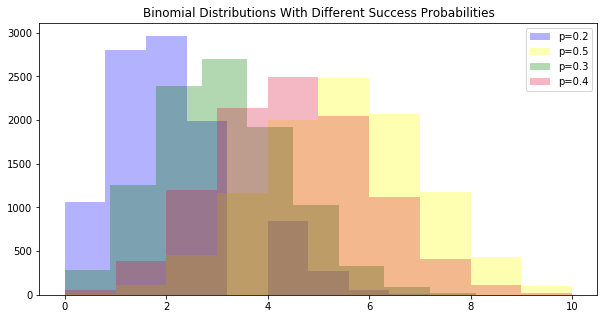

In [57]:
fig, axes = plt.subplots(2,2)

In [60]:
s3_100 = np.random.choice(bi["pop3"], 100, replace=True)
s4_100 = np.random.choice(bi["pop4"], 100, replace=True)

In [69]:
t_13 = ttest_ind(p1_samp, s3_100)
t_14 = ttest_ind(p1_samp, s4_100)

print("p1 and p3: {}".format(t_13))
print("p1 and p4: {}".format(t_14))

p1 and p3: Ttest_indResult(statistic=-4.556928836344394, pvalue=9.070076221829456e-06)
p1 and p4: Ttest_indResult(statistic=-11.173017691041407, pvalue=8.641667653119106e-23)


In [74]:
pois = pd.Series(np.random.poisson(2, 10000))
pois_100 = np.random.choice(pois, 100)

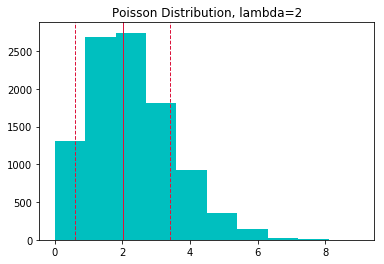

In [80]:
plt.figure()
plt.hist(pois, color='c')
plt.axvline(pois.mean(), color='crimson', linewidth=1)
plt.axvline(pois.mean() + pois.std(), color='crimson', linewidth=1, linestyle='dashed')
plt.axvline(pois.mean() - pois.std(), color='crimson', linewidth=1, linestyle='dashed')
plt.title("Poisson Distribution, lambda=2")
plt.show()

### Mean and Standrd Deviation for Poisson Distribution
The mean and standard deviation are not a great estimate for a central tendency or variation because the distribution is right skewed. But the central limit tendency will still hold.